In [7]:
from keras.models import load_model
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Load the saved models
model_timeframe = load_model('/content/best_timeframe_model_final1.keras')

# Read the new dataset
new_data = pd.read_csv('/content/machine_test_data.csv')

# Add 'Attrition' column with a random value to match features of algorithm
new_data['Attrition'] = 333

# Select features for time frame prediction
X_new_timeframe = new_data[['Age', 'DistanceFromHome', 'Education','DailyRate','HourlyRate', 'JobInvolvement',
                           'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike','WorkLifeBalance',
                           'YearsSinceLastPromotion', 'PerformanceRating', 'YearsInCurrentRole','YearsWithCurrManager',
                           'EnvironmentSatisfaction', 'NumCompaniesWorked','TotalWorkingYears','Attrition']]

# Scale the new data for time frame prediction using a new scaler
scaler_timeframe = StandardScaler()
X_new_timeframe_scaled = scaler_timeframe.fit_transform(X_new_timeframe)

# Predict time frame for new employees
timeframe_predictions = model_timeframe.predict(X_new_timeframe_scaled)

# Threshold for years until leave to determine attrition
threshold_years = 3

# Update 'Attrition' column based on predicted time frame
new_data['Timeframe_Predicted'] = timeframe_predictions
new_data['Attrition_Predicted'] = ['No' if years > threshold_years else 'Yes' for years in new_data['Timeframe_Predicted']]
new_data.drop(columns=['Attrition'], inplace=True)
# Print the new dataset with predicted columns
new_data

4/4 [==============================] - 0s 4ms/step


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Timeframe_Predicted,Attrition_Predicted
0,28,Travel_Rarely,866,Sales,5,3,Medical,1,1469,4,...,0,6,4,3,5,4,1,3,9.697755,No
1,53,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,4,...,2,5,3,3,4,2,1,3,8.500626,No
2,24,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,4,...,1,1,2,3,1,0,0,0,9.775890,No
3,45,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,2,...,1,25,2,3,1,0,0,0,0.875754,Yes
4,36,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,1,304,4,...,0,16,3,4,13,11,3,7,8.573595,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31,Travel_Rarely,1232,Research & Development,7,4,Medical,1,462,3,...,0,11,2,2,11,9,4,10,9.309310,No
96,29,Travel_Rarely,1246,Sales,19,3,Life Sciences,1,1497,3,...,2,10,3,3,10,7,0,4,5.943735,No
97,37,Non-Travel,1063,Research & Development,25,5,Medical,1,529,2,...,2,15,2,3,13,11,10,7,6.608985,No
98,47,Travel_Rarely,571,Sales,14,3,Medical,1,1503,3,...,1,11,4,2,5,4,1,2,4.319707,No


In [8]:
new_data.to_csv('/content/new_data_predicted_final.csv', index=False)


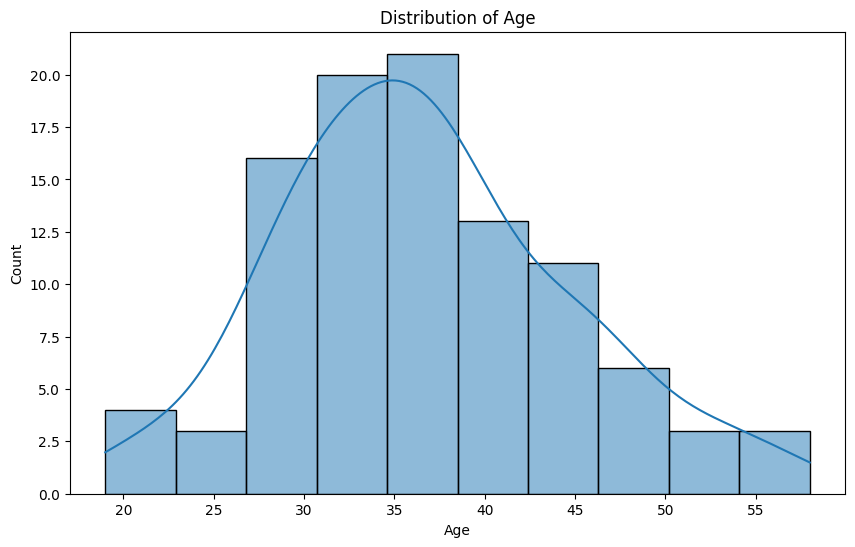

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms and Distribution Plots
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Age'], kde=True)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()


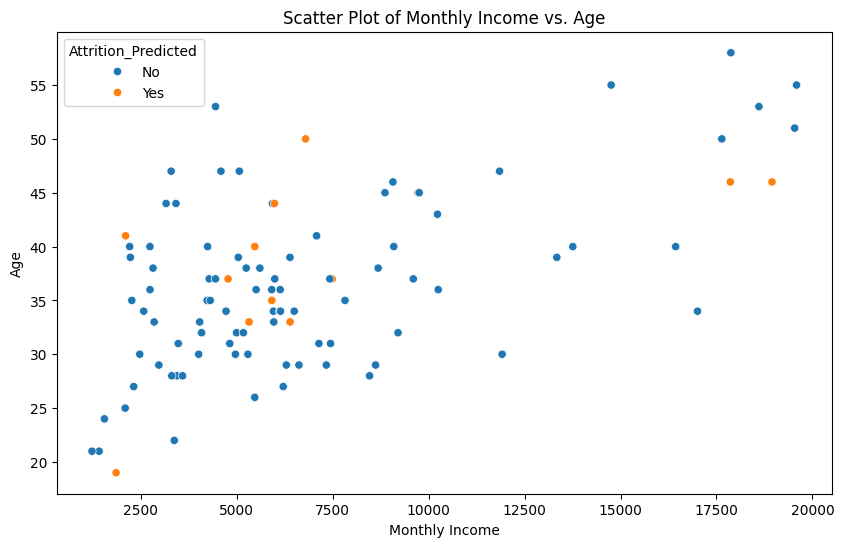

In [12]:
# Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyIncome', y='Age', data=new_data, hue='Attrition_Predicted')
plt.xlabel('Monthly Income')
plt.ylabel('Age')
plt.title('Scatter Plot of Monthly Income vs. Age')
plt.show()

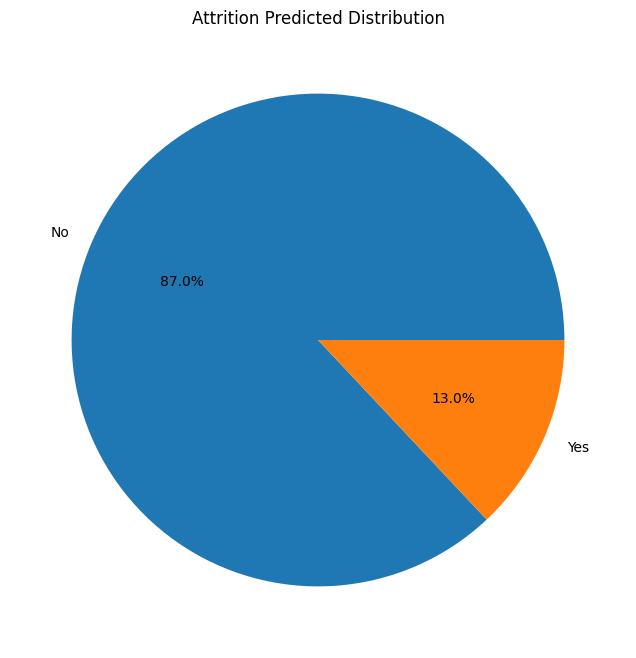

In [14]:
# Pie Chart
plt.figure(figsize=(8, 8))
new_data['Attrition_Predicted'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Attrition Predicted Distribution')
plt.ylabel('')
plt.show()


<ipython-input-22-d6e0dd9f49b8>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importance, y=sorted_feature_names, palette=colors)


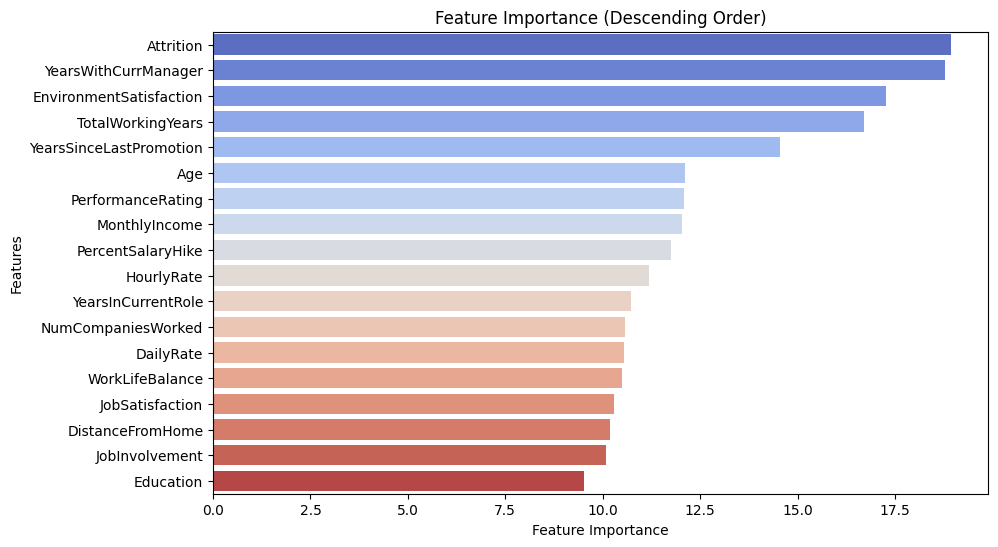

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Retrieve the weights of the model's layers
layer_weights = model_timeframe.get_weights()

# Retrieve the weights of the first layer
dense_layer_weights = layer_weights[0]

# Calculate the feature importance by summing up the absolute weights
feature_importance = np.sum(np.abs(dense_layer_weights), axis=1)

# Define feature names
feature_names = ['Age', 'DistanceFromHome', 'Education', 'DailyRate', 'HourlyRate', 'JobInvolvement',
                 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike', 'WorkLifeBalance',
                 'YearsSinceLastPromotion', 'PerformanceRating', 'YearsInCurrentRole', 'YearsWithCurrManager',
                 'EnvironmentSatisfaction', 'NumCompaniesWorked', 'TotalWorkingYears', 'Attrition']

# Sort feature importance and corresponding feature names in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = feature_importance[sorted_indices]

# Assign colors based on feature importance
colors = sns.color_palette("coolwarm", len(sorted_feature_names))

# Plot the feature importance with colored bars
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importance, y=sorted_feature_names, palette=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Descending Order)')
plt.show()